# Análisis de datos

## Introducción  
Se realizará el análisis de una base de datos de Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. El objetivo es encontrar patrones en la información disponible, a fin de comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.  

Se analizará los datos de los competidores y se probará una hipótesis sobre el impacto del clima en la frecuencia de los viajes.  

Previo al presente análisis, mediante el uso de SQL, se procesaron las tablas y bases de datos provistos por la empresa con el uso de SQL, a fin de tener los datos procesados para el análisis.

## Análisis exploratorio de datos
### Importación de librerías y datasets

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [4]:
company_trips = pd.read_csv('./datasets/moved_project_sql_result_01.csv')
location_trips = pd.read_csv('./datasets/moved_project_sql_result_04.csv')

### Visualización de datos y detección de errores

Si bien los dataset importados ya han sido pre-procesados mediante SQL, se realizará un chequeo de los DataFrame generados, a fin de garantizar la ausencia de errores en los mismos.  
Se realizará también una visualización de los datos, a fin de poder tener una idea global de los mismos.

In [13]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [14]:
location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
def error_detection(df): #Función para detectar errores en dataset y convertir todos los títulos de columnas en convención snake_case
    #Detección de valores ausentes por columna:
    for column in df:
        print(f'Valores ausentes en columna {column}:', df[column].isna().sum())
    print()
    #Detección de filas duplicadas:
    print('Cantidad de filas duplicadas:', df.duplicated().sum())
    print()
    #Cambiar formato erróneo en nombres de columnas:
    new_col_name = {}
    for column in df:
        new_col_name[column]= column.strip().lower().replace(' ', '_')
    df.rename(columns=new_col_name, inplace=True)
    return df

In [8]:
error_detection(company_trips)

Valores ausentes en columna company_name: 0
Valores ausentes en columna trips_amount: 0

Cantidad de filas duplicadas: 0



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [11]:
print('Valores duplicados en "company_name":', company_trips['company_name'].duplicated().sum())

Valores duplicados en "company_name": 0


In [12]:
error_detection(location_trips)

Valores ausentes en columna dropoff_location_name: 0
Valores ausentes en columna average_trips: 0

Cantidad de filas duplicadas: 0



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


Conclusión:  
* Se observa que los datos contienen:  
    * "company_trips": datos sobre laas diferentes compañías de transporte, y cantidad de viajes realizados por cada una de ellas el 15 y 16 de noviembre del 2017. La tabla se ordena por cantidad de viajes realizados, en orden descendente, para cada compañía.  
    * "location_trips": datos sobre los viajes realizados en función del barrio de destino en el mes de noviembre del 2017. La tabla contiene el valor promedio de viajes realizados por todas las compañías, para el mismo local de destino, ordenados en forma descendente para cada destino.  
* No se detectan valores ausentes, ni filas duplicadas, ni duplicados en los nombres de las compañías, en ninguna de los dos dataset.  
* Los nombres de las columnas respetan el formato snake_case
* Los tipos de datos son los correctos para cada columna en los dataset, con valores del tipo 'int' para el conteo de los viajes, y valores tipo 'float' para los promedios de los viajes.

### Principales barrios en término de finalización del recorrido

Se evalúa a continuación cuáles fueron los 10 destinos más concurridos por los usuarios en el mes de noviembre del 2017.

In [16]:
location_trips.sort_values(by='average_trips', ascending=False)[:10]

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Se representa a continuación, en forma gráfica, las compañías que tuvieron al menos 100 viajes entre el 15 y 16 de noviembre:

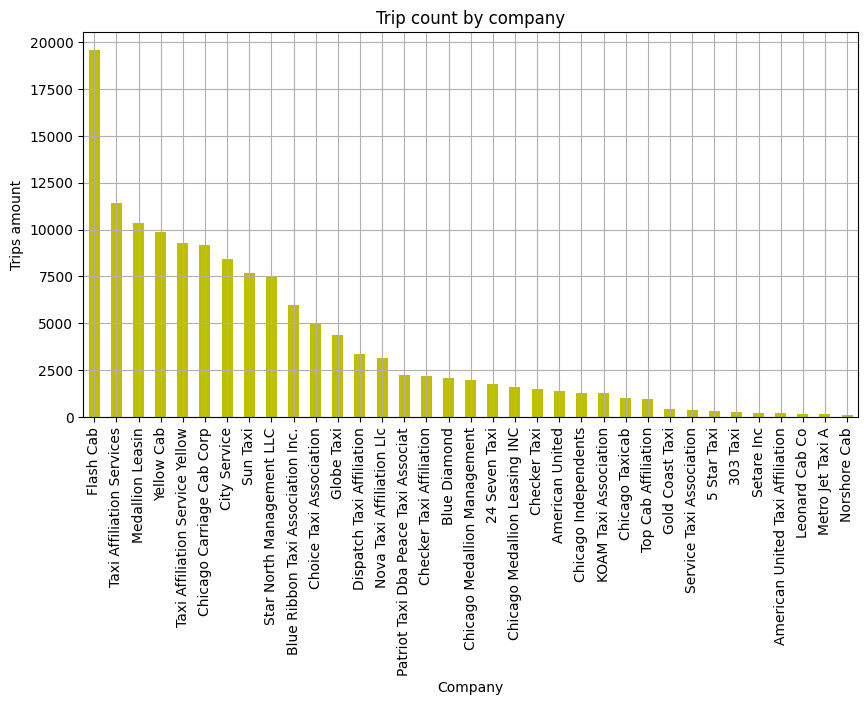

In [23]:
company_trips.query('trips_amount > 100').plot(x='company_name' ,kind='bar', title='Trip count by company', xlabel='Company', ylabel='Trips amount', figsize=[10, 5], color='#BFBF00', rot=90, grid=True, legend=False)
plt.show()

Se representa a continuación, en forma gráfica, los diez destinos más concurridos por los usuarios en el mes de noviembre del 2017:

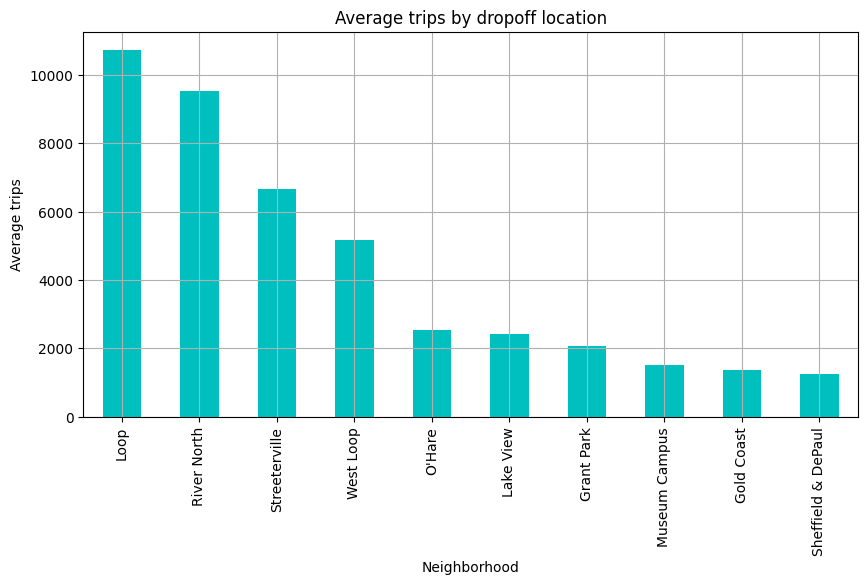

In [25]:
location_trips.sort_values(by='average_trips', ascending=False)[:10].plot(x='dropoff_location_name' ,kind='bar', title='Average trips by dropoff location', xlabel='Neighborhood', ylabel='Average trips', figsize=[10, 5], color='#00BFBF', rot=90, grid=True, legend=False)
plt.show()

Conclusiones:  
* En cuanto a destinos, se observa que tuvieron una mayor concurrencia los barrios "Loop" y "River North".  
* En cuanto a compañias de transporte, se nota una clara preferencia de la empresa Flash Cab para los días estudiados.  

Ambas conclusiones podrían llegar a estar relacionadas entre sí, como, por ejemplo, podría ser si para ir al/a los destinos más concurridos, el servicio de "Flash Cab" fuera el único disponible, o el que ofrece mejores servicios o garantías.  
En cuanto a los destinos más concurridos, deberíamos poseer datos de fechas especiales en Chicago, a fin de poder evaluar relaciones entre los mismos, ya que, podría ser el caso de que en el mes de noviembre, muchas personas viajan a un determinado lugar por causa de la fecha. También tiene una gran influencia las condiciones climáticas, que se evaluarán a continuación.

## Prueba de hipótesis

Se importa a continuación la tabla resumen de los viajes realizados los días sábados del mes de noviembre, con local de origen en Loop  y hasta el Aeropuerto Internacional O'Hare. Se incluye la fecha de incicio de los viajes, las duraciones de los mismos, y las condiciones climáticas de dicho día, a fin de evaluar la influencia de las mismas en los viajes realizados por los usuarios.

In [37]:
ohare_trips = pd.read_csv('./datasets/moved_project_sql_result_07.csv')
ohare_trips.info()
display(ohare_trips.sample(5))
ohare_trips['weather_conditions'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
135,2017-11-11 11:00:00,Good,1380.0
296,2017-11-04 17:00:00,Bad,2640.0
40,2017-11-04 13:00:00,Good,2940.0
392,2017-11-18 10:00:00,Bad,1740.0
928,2017-11-04 11:00:00,Good,2400.0


array(['Good', 'Bad'], dtype=object)

A continuación se evalúa una prueba de hipótesis entre las medias de grupos de datos.  
Se establece la hipótesis nula y la alternativa. La hipótesis nula se plantea como aquella en que se supone igualdad de valores promedio, mientras que la alternativa surge del rechazo de la hipótesis nula: las medias no son iguales.  
Se establece como significación estadística un valor de 3%, considerando que es un buen nivel de significación estadística dado el tamaño de la muestra.  
Se utiliza la función *scipy.stats.ttest_ind()* para la prueba, ya que se trata de una hipótesis de igualdad de medias de dos poblaciones.

Se probará la siguiente hipótesis:  
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"  

Por lo tanto, se plantean como hipótesis nula y alternativa:
* Hipótesis nula: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados lluviosos"
* Hipótesis alternativa: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

In [45]:
ohare_trips_raining = ohare_trips.query('weather_conditions == "Bad"')['duration_seconds']
ohare_trips_good = ohare_trips.query('weather_conditions == "Good"')['duration_seconds']

print('Varianza en la duración promedio de los viajes en sábados lluviosos:', np.var(ohare_trips_raining))
print('Varianza en la duración promedio de los viajes en sábados sin lluvia:', np.var(ohare_trips_good))

alpha = 0.03

results = st.ttest_ind(ohare_trips_raining, ohare_trips_good,  equal_var=False)

print('El valor "p" es:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos")
else:
    print("No podemos rechazar la hipótesis nula")

Varianza en la duración promedio de los viajes en sábados lluviosos: 517403.56330246915
Varianza en la duración promedio de los viajes en sábados sin lluvia: 575732.9308497686
El valor "p" es: 6.738994326108734e-12
Rechazamos la hipótesis nula. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos


La probabilidad de que las medias sean iguales es casi nula, por lo que podemos rechazar la hipótesis nula, y asegurar que el clima lluvioso en un día sábado tiene una influencia importante en la duración de los viajes. La lluvia o tormentas puede derivar en un tránsito más lento, presencia de accidentes, autopistas más riesgosas para altas velocidades, etc. Todos estos factores influencian con total seguridad en la duración de dichos viajes.